### Predicting the CO2 Emmission of the Car based on the given Data set using Multiple Linear Regression Model

#### Importing the needed packages

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

#### Importing Data from the csv file and Understanding 

In [67]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


#### Following is the information on the Data with Examples


    -  MODELYEAR e.g. 2014
    -  MAKE e.g. Acura
    -  MODEL e.g. ILX
    -  VEHICLE CLASS e.g. SUV
    -  ENGINE SIZE e.g. 4.7
    -  CYLINDERS e.g 6
    -  TRANSMISSION e.g. A6
    -  FUELTYPE e.g. z
    -  FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
    -  FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
    -  FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
    -  CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0



#### Understanding the Data from Statistical standpoint

In [69]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


#### Correlation Check

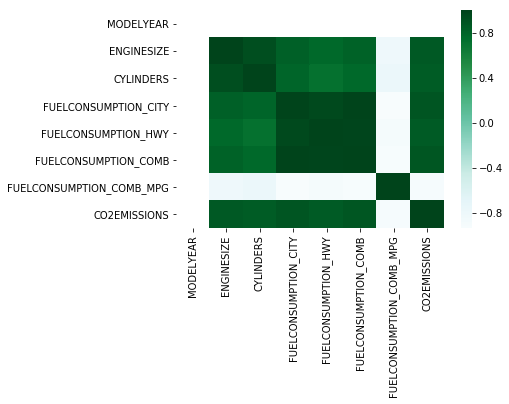

In [76]:
import seaborn as sns

sns.heatmap(df.corr(), cmap='BuGn')

From the above figure we understand that **'ENGINESIZE'**, **'CYLINDERS'**, **'FUELCONSUMPTION_COMB'** are higly correlated with **'CO2EMISSIONS'**

#### Creating a new Dataframe with highly correlated columns

In [77]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


#### Histograms of Engine Size , Cylinders , Fuel Consumption_Comb

In [72]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=2,subplot_titles=("Engine Size", "CO2_Emmision" ,'CYLINDERS','Fuel Consumption'))

Engine_Size = go.Histogram(x=cdf['ENGINESIZE'],nbinsx = 15,name="Engine_Size")
CO2_Emmission = go.Histogram(x=cdf['CO2EMISSIONS'],nbinsx = 15,name="CO2_Emmission")
CYLINDERS = go.Histogram(x=cdf['CYLINDERS'],nbinsx = 15,name="CYLINDERS")
Fuel_Consumption = go.Histogram(x=cdf['FUELCONSUMPTION_COMB'],nbinsx = 15,name="Fuel_Consumption")

fig.append_trace(Engine_Size, 1, 1)
fig.append_trace(CO2_Emmission, 1, 2)
fig.append_trace(CYLINDERS, 2, 1)
fig.append_trace(Fuel_Consumption,2,2)


fig.update_xaxes(title_text="Engine Size", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_xaxes(title_text="CO2 Emmission", row=1, col=2)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_xaxes(title_text="Cylinders", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_xaxes(title_text="Fuel Consumption", row=2, col=2)
fig.update_yaxes(title_text="Count", row=2, col=2)

fig.show()

#### Plotting Scatter plot inorder to find if Linear relationship really exists between 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB' and 'CO2EMISSIONS'

In [6]:
import plotly.graph_objects as go
fig = go.Figure(data = go.Scatter(x=cdf['ENGINESIZE'],y =cdf['CO2EMISSIONS'],mode = 'markers'))
fig.update_xaxes(title_text="Engine Size")
fig.update_yaxes(title_text="Emmission")
fig.update_layout(title = 'Engine Size vs Emmission')
fig.show()

fig = go.Figure(data = go.Scatter(x=cdf['FUELCONSUMPTION_COMB'],y =cdf['CO2EMISSIONS'],mode = 'markers'))
fig.update_xaxes(title_text="Fuel Consumption")
fig.update_yaxes(title_text="Emmission")
fig.update_layout(title = 'Fuel Consumption vs Emmission')
fig.show()

fig = go.Figure(data = go.Scatter(x=cdf['FUELCONSUMPTION_COMB'],y =cdf['CO2EMISSIONS'],mode = 'markers'))
fig.update_xaxes(title_text="Cylinders")
fig.update_yaxes(title_text="Emmission")
fig.update_layout(title = 'Cylinders vs Emmission')
fig.show()

#### Creating Training  and Testing  Dataset

In [78]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
Y = df[['CO2EMISSIONS']]

In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

#### Multiple Regression Model

In [80]:
reg = linear_model.LinearRegression()
reg = reg.fit(X_train,Y_train)

In [81]:
print('Coefficients: ',reg.coef_)
print('Intercept: ',reg.intercept_)

Coefficients:  [[11.08363639  7.10397462  9.89375021]]
Intercept:  [64.81192951]


#### Predicting the Co2 Emmission 

In [84]:
prediction = reg.predict(X_test)


#### Finding the Accuracy of the Model

In [85]:
accuracy = reg.score(X_test,Y_test)

In [86]:
print ('Accuracy:',str(accuracy))

Accuracy: 0.8455271009978369


In [16]:
print ('R2-score: ',r2_score(prediction,Y_test))

R2-score:  0.8332353371283293
